In [26]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [27]:
df = pd.read_csv('BankChurners.csv')
print("df.shape: ", df.shape)
df.head()

df.shape:  (10127, 23)


,CLIENTNUM,Attrition_Flag,Customer_Age,Gender,Dependent_count,Education_Level,Marital_Status,Income_Category,Card_Category,Months_on_book,...,Credit_Limit,Total_Revolving_Bal,Avg_Open_To_Buy,Total_Amt_Chng_Q4_Q1,Total_Trans_Amt,Total_Trans_Ct,Total_Ct_Chng_Q4_Q1,Avg_Utilization_Ratio,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1,Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2
0,768805383,Existing Customer,45,M,3,High School,Married,$60K - $80K,Blue,39,...,12691.0,777,11914.0,1.335,1144,42,1.625,0.061,0.000093,0.99991
1,818770008,Existing Customer,49,F,5,Graduate,Single,Less than $40K,Blue,44,...,8256.0,864,7392.0,1.541,1291,33,3.714,0.105,0.000057,0.99994
2,713982108,Existing Customer,51,M,3,Graduate,Married,$80K - $120K,Blue,36,...,3418.0,0,3418.0,2.594,1887,20,2.333,0.000,0.000021,0.99998
3,769911858,Existing Customer,40,F,4,High School,Unknown,Less than $40K,Blue,34,...,3313.0,2517,796.0,1.405,1171,20,2.333,0.760,0.000134,0.99987
4,709106358,Existing Customer,40,M,3,Uneducated,Married,$60K - $80K,Blue,21,...,4716.0,0,4716.0,2.175,816,28,2.500,0.000,0.000022,0.99998


- **고객id**
  - **Clientnum**: Client number. Unique identifier for the customer holding the account

- **Target/Label**
  - **Attrition_flag**: Internal event (customer activity) variable - if the account is closed then 1 else 0

- **인구통계학적 feature**
  - **Age**: Demographic variable - Customer's age
  - **Gender**: Demographic variable - M=Male, F=Female
  - **Dependent_count**: Demographic variable - Number of dependents (부양가족 수)
  - **Education_level**: Demographic variable - Educational Qualification of the account holder (example: high school, college graduate, etc.)
  - **Marital_status**: Demographic variable - Married, Single, Divorced, Unknown
  - **Income_category**: Demographic variable - Annual Income Category of the account holder (< 40K, 40K - 60K, 60K - 80K, 80K-120K, > 120K, Unknown)

- **제품 관련 feature**
  - **Card_category**: Product Variable - Type of Card (Blue, Silver, Gold, Platinum)
  - **Months_on_book**: Period of relationship with bank
  - **Total_relationship_count**: Total no. of products held by the customer
  - **Months_inactive_12_mon**: No. of months inactive in the last 12 months
  - **Contacts_count_12_mon**: No. of Contacts in the last 12 months
  - **Credit_limit**: Credit Limit on the Credit Card
  - **Total_revolving_bal**: Total Revolving Balance on the Credit Card
  - **Avg_open_to_buy**: Open to Buy Credit Line (Average of last 12 months)
  - **Total_amt_chng_Q4_Q1**: Change in Transaction Amount (Q4 over Q1)
  - **Total_Trans_Amt**: Total Transaction Amount (Last 12 months)
  - **Total_Trans_Ct**: Total Transaction Count (Last 12 months)
  - **Total_Ct_Chng_Q4_Q1**: Change in Transaction Count (Q4 over Q1)
  - **Avg_Utilization_Ratio**: Average Card Utilization Ratio

- **사용하지 않는 feature:**
  - **Naive_Bayes_Classifier_Attrition_Flag**: Document said 'PLEASE IGNORE THE LAST 2 COLUMNS (NAIVE BAYES CLAS…). I SUGGEST TO RATHER DELETE IT BEFORE DOING ANYTHING'


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [37]:
# null값 확인
df.isnull().any()

Attrition_Flag              False
Customer_Age                False
Gender                      False
Dependent_count             False
Education_Level             False
Marital_Status              False
Income_Category             False
Card_Category               False
Months_on_book              False
Total_Relationship_Count    False
Months_Inactive_12_mon      False
Contacts_Count_12_mon       False
Credit_Limit                False
Total_Revolving_Bal         False
Avg_Open_To_Buy             False
Total_Amt_Chng_Q4_Q1        False
Total_Trans_Amt             False
Total_Trans_Ct              False
Total_Ct_Chng_Q4_Q1         False
Avg_Utilization_Ratio       False
dtype: bool

In [38]:
# 중복값이 있는지 검사 (client id 등)
df.duplicated().any()

False

In [30]:
# 의미없는 행 제거
df = df.iloc[:, 1:-2]
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

In [31]:
# TODO: flag 변수에 대해 추후 미세한 조정 필요
num_cols = df.select_dtypes(include=np.number).columns
cat_cols = df.select_dtypes(exclude=np.number).columns
print("num_cols: ", num_cols)
print("cat_cols: ", cat_cols)

num_cols:  Index(['Customer_Age', 'Dependent_count', 'Months_on_book',
       'Total_Relationship_Count', 'Months_Inactive_12_mon',
       'Contacts_Count_12_mon', 'Credit_Limit', 'Total_Revolving_Bal',
       'Avg_Open_To_Buy', 'Total_Amt_Chng_Q4_Q1', 'Total_Trans_Amt',
       'Total_Trans_Ct', 'Total_Ct_Chng_Q4_Q1', 'Avg_Utilization_Ratio'],
      dtype='object')
cat_cols:  Index(['Attrition_Flag', 'Gender', 'Education_Level', 'Marital_Status',
       'Income_Category', 'Card_Category'],
      dtype='object')


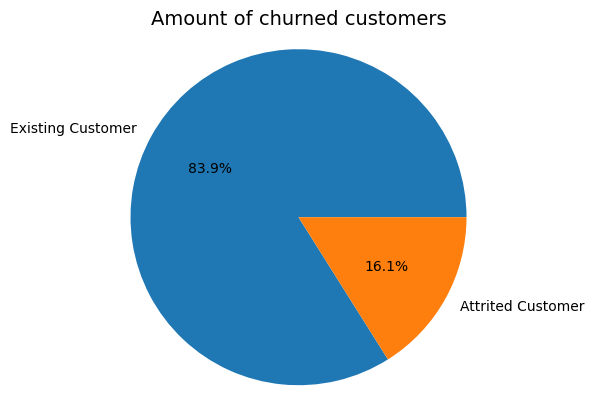

In [44]:
# 해당 분포로부터 class에 imbalance가 있는지 확인할 수 있다 

target = df["Attrition_Flag"].value_counts()

fig1, ax1 = plt.subplots()

ax1.pie(target, labels=target.index, autopct='%1.1f%%')
ax1.axis('equal')
plt.title("Amount of churned customers", fontsize=14)
plt.show()

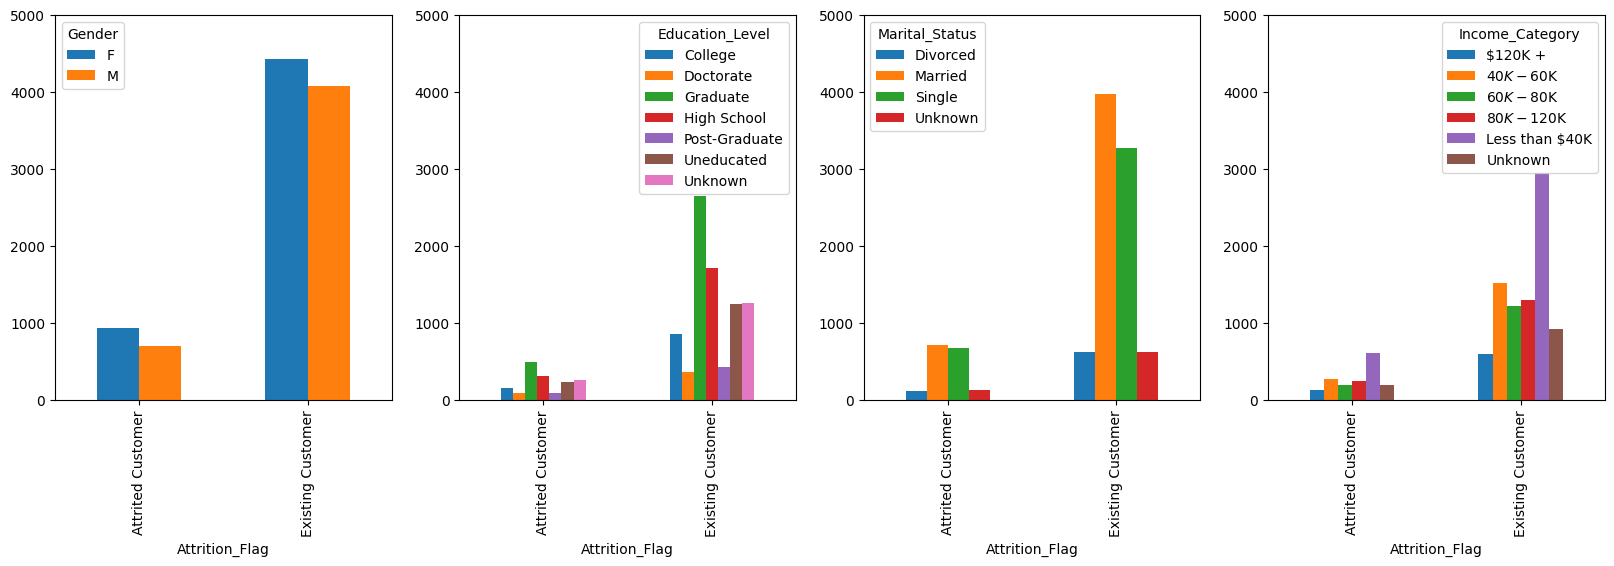

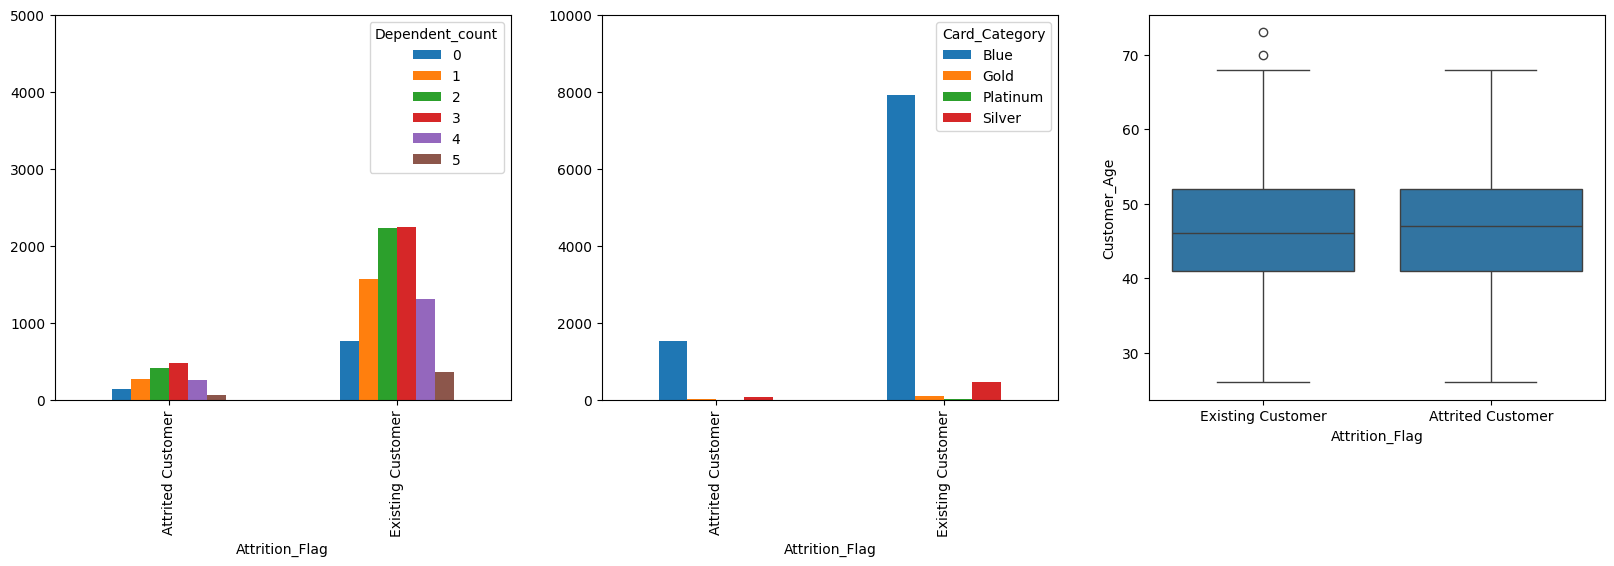

In [62]:
# 이탈유무에 따른 인구통계학적 특징 분석

df_demographic=pd.concat([df['Customer_Age'],df['Gender'],df['Education_Level'],df['Marital_Status'],df['Income_Category'],df['Attrition_Flag']],axis=1)
fig,(ax, ax2, ax3, ax4)=plt.subplots(ncols=4,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Gender']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Education_Level']).plot(kind='bar',ax=ax2, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Marital_Status']).plot(kind='bar',ax=ax3, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Income_Category']).plot(kind='bar',ax=ax4, ylim=[0,5000])

fig,(ax, ax2, ax3)=plt.subplots(ncols=3,figsize=(20,5))
pd.crosstab(df['Attrition_Flag'],df['Dependent_count']).plot(kind='bar',ax=ax, ylim=[0,5000])
pd.crosstab(df['Attrition_Flag'],df['Card_Category']).plot(kind='bar',ax=ax2, ylim=[0,10000])
_box=sns.boxplot(data = df_demographic,x='Attrition_Flag',y='Customer_Age', ax=ax3)

In [90]:
# plot을 위한 helper function

churned = df[df['Attrition_Flag'] == "Attrited Customer"]
nonchurned = df[df['Attrition_Flag'] == "Existing Customer"]

def plot_pie(column):
    target = df[column].value_counts()
    fig1, ax1 = plt.subplots()
    ax1.pie(target, labels=target.index, autopct='%1.1f%%', shadow=None)
    ax1.axis('equal')
    plt.title("All customers", fontsize=14)
    plt.show()

def plot_compare(column, category_name):
    churned = df[df['Attrition_Flag'] == "Attrited Customer"]
    nonchurned = df[df['Attrition_Flag'] == "Existing Customer"]
    
    NChurned = len(churned[column].unique())
    NNonChurned = len(nonchurned[column].unique())
    
    ChurnedCounts = churned[column].value_counts().sort_index()
    NonChurnedCounts = nonchurned[column].value_counts().sort_index()
    
    indchurned = np.arange(NChurned)
    indnonchurned = np.arange(NNonChurned)
    width = 0.8
    
    figs, axs = plt.subplots(1, 2, figsize=(14, 6))
    
    axs[1].bar(indchurned, ChurnedCounts, width, color='red', edgecolor='black')
    axs[1].set_title('Churned ' + category_name, fontsize=18)
    axs[1].set_xticks(indchurned)
    axs[1].set_xticklabels(ChurnedCounts.index.tolist(), rotation=45, fontsize=12)
    axs[1].tick_params(axis='y', labelsize=12)
    
    axs[0].bar(indnonchurned, NonChurnedCounts, width, color='blue', edgecolor='black')
    axs[0].set_title('Non Churned ' + category_name, fontsize=18)
    axs[0].set_ylabel('Amount of People', fontsize=14)
    axs[0].set_xticks(indnonchurned)
    axs[0].set_xticklabels(NonChurnedCounts.index.tolist(), rotation=45, fontsize=12)
    axs[0].tick_params(axis='y', labelsize=12)
    
    plt.tight_layout()
    plt.show()

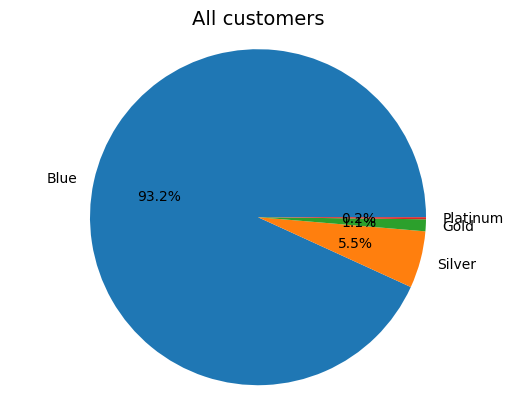

In [91]:
plot_pie("Card_Category")

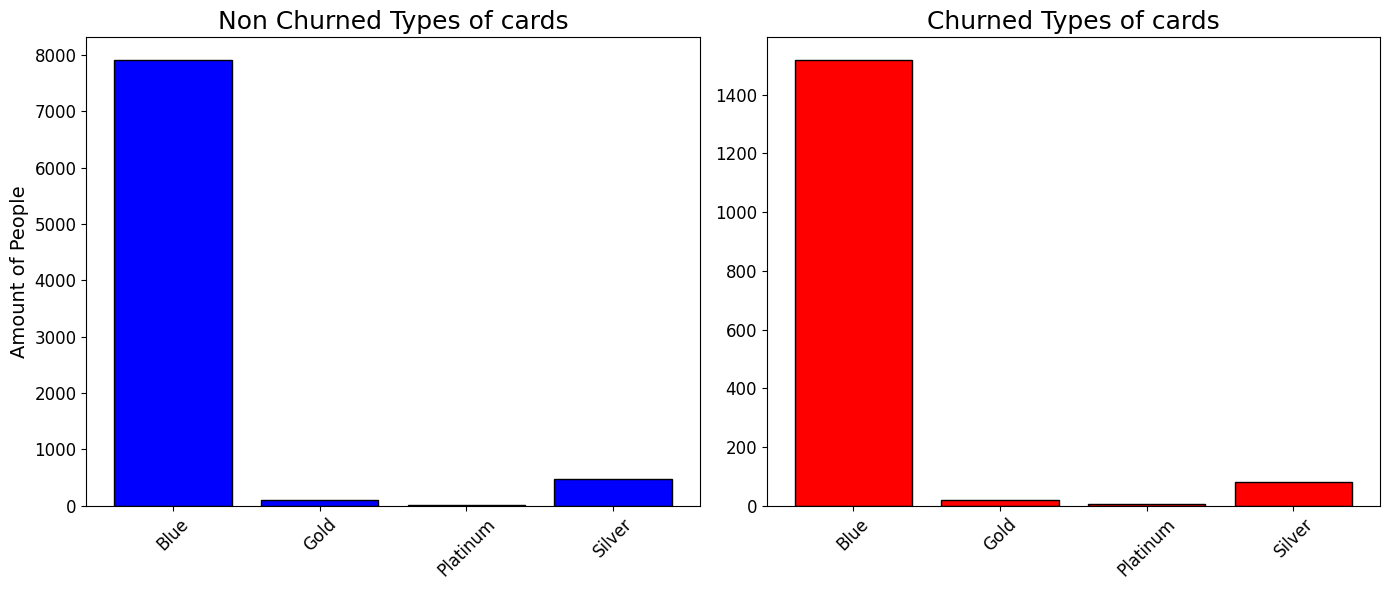

In [92]:
plot_compare("Card_Category", "Types of cards")


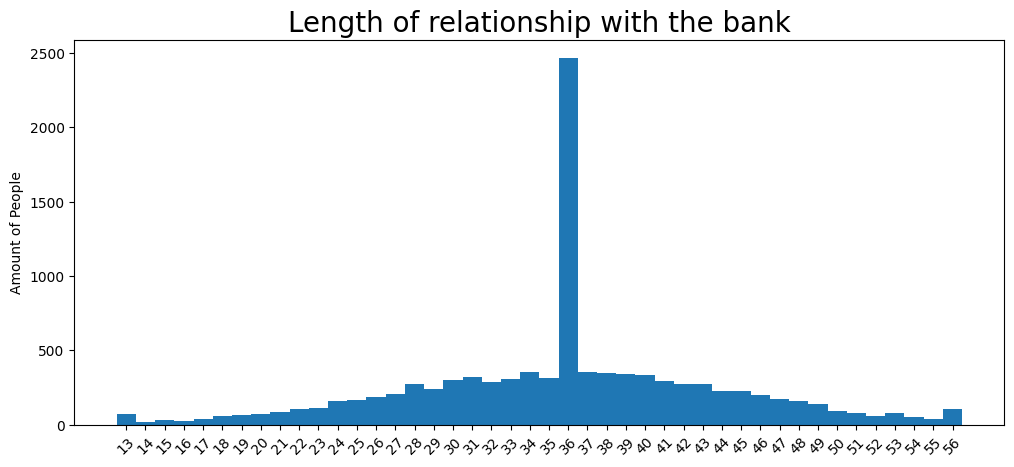

In [93]:
column = "Months_on_book"

N = len(df[column].unique())
DataCounts = df[column].value_counts().sort_index()

ind = np.arange(N) 
width = 1       

figs, axs = plt.subplots(figsize=(12,5))

axs.bar(ind, DataCounts, width)
axs.set_ylabel('Amount of People')
axs.set_title('Length of relationship with the bank', fontsize=20)
axs.set_xticks(ind)
axs.set_xticklabels(DataCounts.index.tolist(), rotation=45)

plt.show()

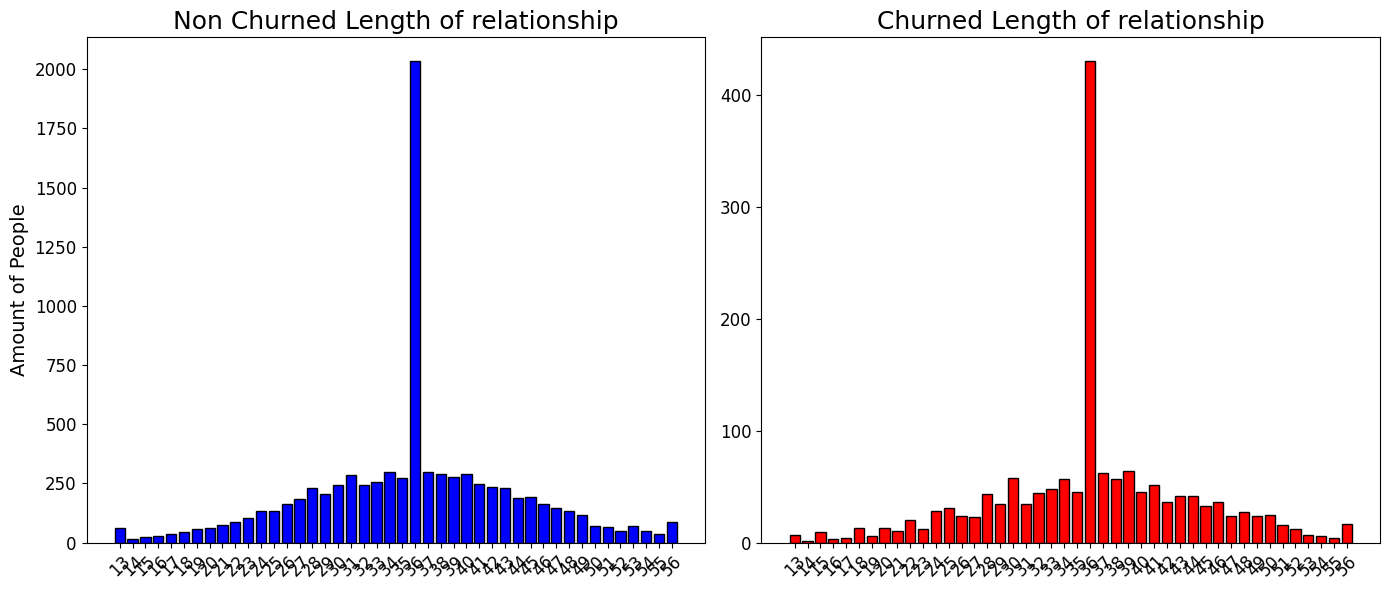

In [94]:
plot_compare("Months_on_book", "Length of relationship")


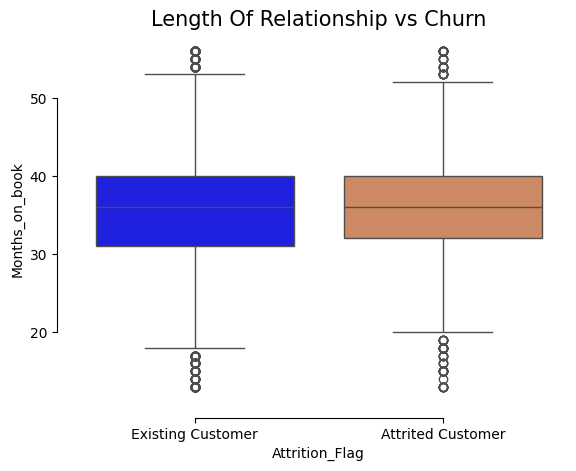

In [95]:
sns.boxplot(x="Attrition_Flag", y="Months_on_book",
            hue="Attrition_Flag", palette=["b", "#DD8452"],
            data=df).set_title("Length Of Relationship vs Churn", fontsize=15)
sns.despine(offset=10, trim=True)

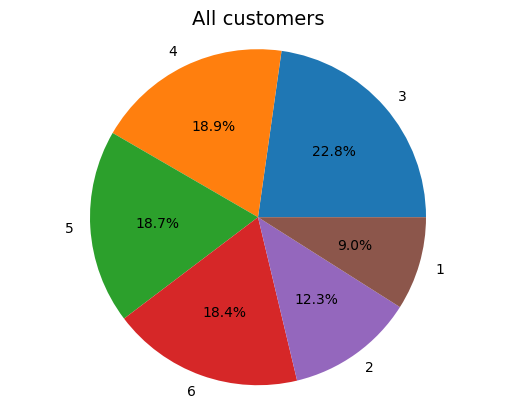

In [96]:
plot_pie("Total_Relationship_Count")


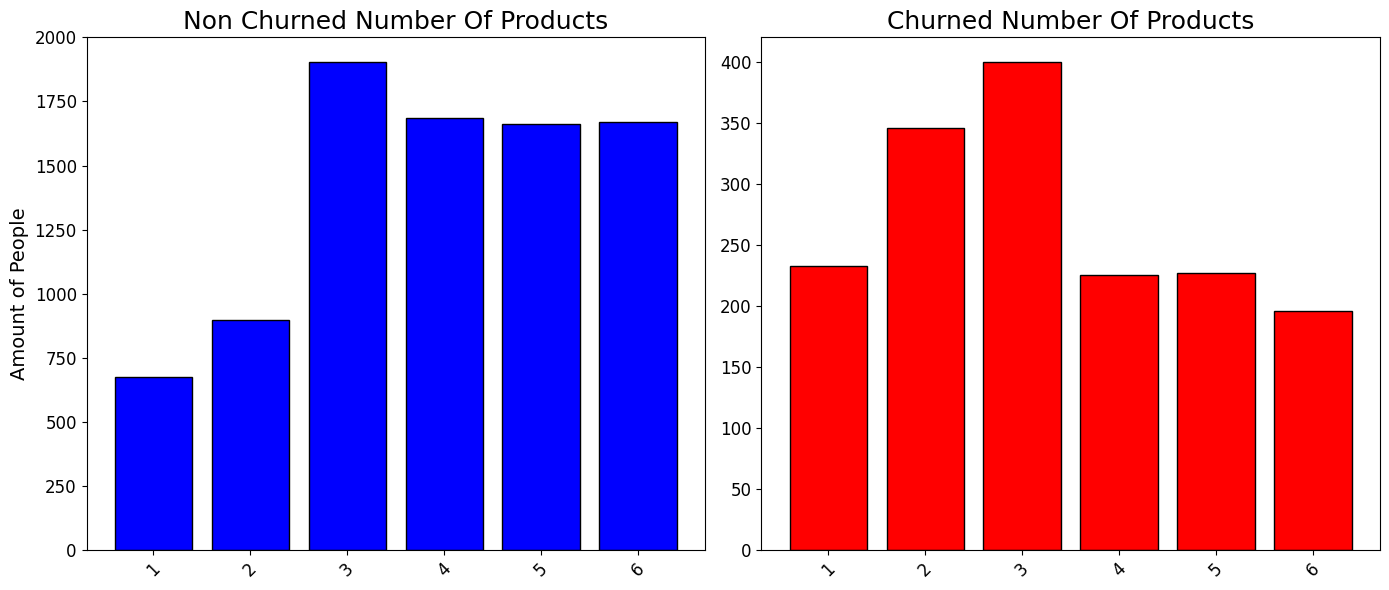

In [97]:
plot_compare("Total_Relationship_Count", "Number Of Products")
